# HEART DISEASE PREDICITON

IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA

In [2]:
data = pd.read_csv("C:/Users/avk/Desktop/Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


# DATA CLEANING

 - handling missing data

In [3]:
data = data.dropna(axis=0)

Printing head of the data

In [4]:
data.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Printing tail of the data

In [5]:
data.tail(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


Printing columns of the data

In [6]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Printing data types of the data

In [7]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

Printing info of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

FINDING THE MISSING VALUES IN DATASET

In [9]:
data.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().any()

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

In [11]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


# ENCODING

CONVERTING THE CATEGORICAL VALUES INTO NUMERICAL VALUES

In [12]:
d={'Presence':1,'Absence':0}
data['Heart Disease'] = data['Heart Disease'].map(d)

In [13]:
data.isnull().any()

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

# SPLITTING THE DATA

DATASET SPLITTED INTO TRAINING AND TESTING DATASET

In [14]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify = data['Heart Disease'],test_size = 0.25, random_state = 42)


In [15]:
x_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
124,54,1,3,125,273,0,2,152,0,0.5,3,1,3
41,62,0,4,124,209,0,0,163,0,0.0,1,0,3
21,48,1,2,130,245,0,2,180,0,0.2,2,0,3
184,53,1,3,130,246,1,2,173,0,0.0,1,3,3
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,50,1,4,144,200,0,2,126,1,0.9,2,0,7
109,45,0,2,112,160,0,0,138,0,0.0,2,0,3
225,41,1,2,135,203,0,0,132,0,0.0,2,0,6
128,52,1,2,134,201,0,0,158,0,0.8,1,1,3


In [16]:
x_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
231,39,1,4,118,219,0,0,140,0,1.2,2,0,7
122,57,1,4,152,274,0,0,88,1,1.2,2,1,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
213,58,1,4,128,216,0,2,131,1,2.2,2,3,7
166,50,0,4,110,254,0,2,159,0,0.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,64,1,4,120,246,0,2,96,1,2.2,3,1,3
82,58,1,4,150,270,0,2,111,1,0.8,1,0,7
101,67,1,4,120,237,0,0,71,0,1.0,2,0,3
158,56,1,1,120,193,0,2,162,0,1.9,2,0,7


In [17]:
y_train

124    0
41     0
21     0
184    0
251    0
      ..
34     1
109    0
225    0
128    0
146    1
Name: Heart Disease, Length: 202, dtype: int64

In [18]:
y_test

231    1
122    1
266    0
213    1
166    0
      ..
133    1
82     1
101    1
158    0
189    1
Name: Heart Disease, Length: 68, dtype: int64

SHAPE OF THE SPLITTED DATASET

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(202, 13)
(68, 13)
(202,)
(68,)


# EVALUATION METRICS

FUNCTION TO PREDICT ACCURACY,SPECIFICITY,SENSITIVITY

In [20]:
def content(name,y_test,pred):
    import seaborn as sns
    print("***********",name,"**********")
    plt.title("CONFUSION MATRIX")
    sns.heatmap(confusion_matrix(y_test, pred)%100, annot=True, cmap="YlGn")
    plt.xlabel("PREDICTED VALUES")
    plt.ylabel("ACTUAL VALUES")
    plt.figure(figsize=(6,6))
    plt.show()
    
    conf_mat=(confusion_matrix(y_test, pred)% 100)
    TN = conf_mat[0][0]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    
    print("confusion matrix for",name," is ")
    print("TP = ",TP," FP = ",FP," FN = ",FN," TN = ",TN)
    print("********** ACCURACY ************")
    acc=(TP+TN)/(TP+TN+FP+FN) * 100
    print("Accuracy for ",name," = ",round(acc,2))
    print("********** SENSITIVITY ************")
    sen=(TP)/(TP+FN) * 100
    print("Sensitivity for ",name," = ",round(sen,2))
    print("********** SPECIFICITY ************")
    spec=(TN)/(TN+FP) * 100
    print("Specificity for ",name," = ",round(spec,2))
    

1) ADABOOST CLASSIFIER

*********** ADABOOST **********


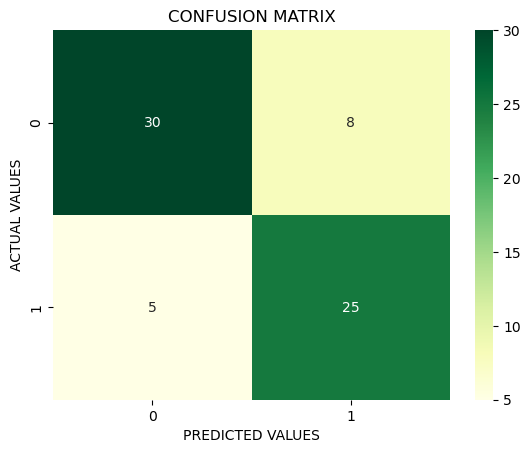

<Figure size 600x600 with 0 Axes>

confusion matrix for ADABOOST  is 
TP =  25  FP =  8  FN =  5  TN =  30
********** ACCURACY ************
Accuracy for  ADABOOST  =  80.88
********** SENSITIVITY ************
Sensitivity for  ADABOOST  =  83.33
********** SPECIFICITY ************
Specificity for  ADABOOST  =  78.95


In [21]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 1,random_state=1)
abc.fit(x_train,y_train)
pred = abc.predict(x_test)
content("ADABOOST",y_test,pred)

2) SUPPORT VECTOR MACHINE

*********** SUPPORT VECTOR MACHINE **********


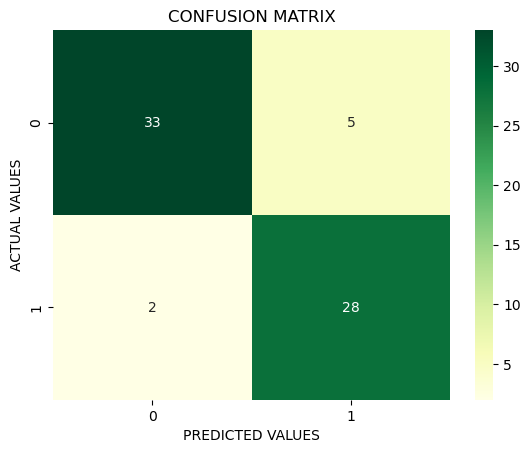

<Figure size 600x600 with 0 Axes>

confusion matrix for SUPPORT VECTOR MACHINE  is 
TP =  28  FP =  5  FN =  2  TN =  33
********** ACCURACY ************
Accuracy for  SUPPORT VECTOR MACHINE  =  89.71
********** SENSITIVITY ************
Sensitivity for  SUPPORT VECTOR MACHINE  =  93.33
********** SPECIFICITY ************
Specificity for  SUPPORT VECTOR MACHINE  =  86.84


In [22]:
from sklearn.svm import SVC
s = SVC(kernel="linear",random_state=42)
s.fit(x_train,y_train)
pred=s.predict(x_test)
content("SUPPORT VECTOR MACHINE",y_test,pred)

3) RANDOM FOREST CLASSIFIER

*********** RANDOM FOREST CLASSIFIER **********


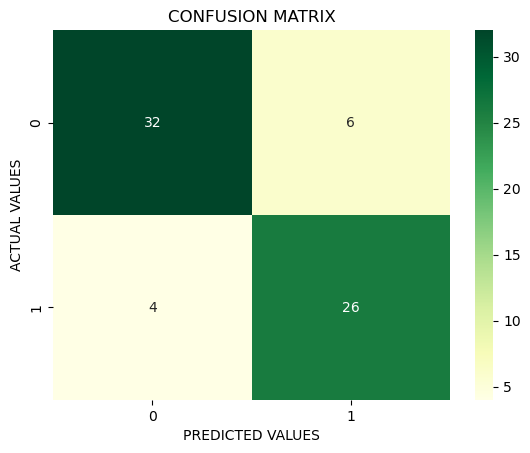

<Figure size 600x600 with 0 Axes>

confusion matrix for RANDOM FOREST CLASSIFIER  is 
TP =  26  FP =  6  FN =  4  TN =  32
********** ACCURACY ************
Accuracy for  RANDOM FOREST CLASSIFIER  =  85.29
********** SENSITIVITY ************
Sensitivity for  RANDOM FOREST CLASSIFIER  =  86.67
********** SPECIFICITY ************
Specificity for  RANDOM FOREST CLASSIFIER  =  84.21


In [23]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators = 11, criterion="entropy",random_state=42)
rand.fit(x_train,y_train)
pred = rand.predict(x_test)
content("RANDOM FOREST CLASSIFIER",y_test,pred)

4) K NEAREST NEIGHBOR CLASSIFIER

*********** KNN ALGORITHM **********


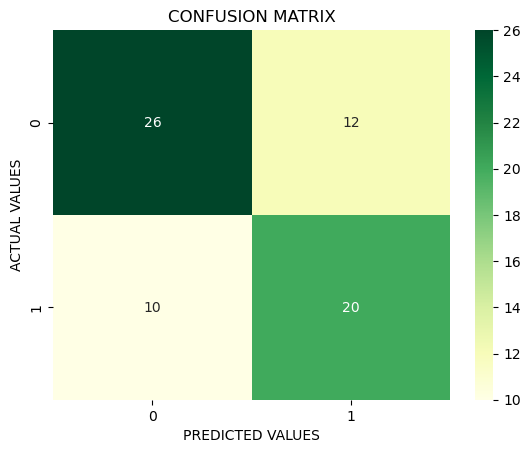

<Figure size 600x600 with 0 Axes>

confusion matrix for KNN ALGORITHM  is 
TP =  20  FP =  12  FN =  10  TN =  26
********** ACCURACY ************
Accuracy for  KNN ALGORITHM  =  67.65
********** SENSITIVITY ************
Sensitivity for  KNN ALGORITHM  =  66.67
********** SPECIFICITY ************
Specificity for  KNN ALGORITHM  =  68.42


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
content("KNN ALGORITHM",y_test,y_pred)